In [1]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## True demand

In [3]:
with open("output/true_demand_7_9_results.json") as f:
    temp_json = json.load(f)

In [4]:
print(f"Levaing rate:{temp_json['pax_leaving_rate'][0]} \t Mean waiting time:{np.mean(temp_json['pax_wait_time'])} \t Mean traveling time: {np.mean(temp_json['pax_travel_time'])}")

Levaing rate:0.03274570910274897 	 Mean waiting time:122.03666933240899 	 Mean traveling time: 430.01741628870644


## Robust optimization

In [2]:
# evaluation metrics
ρ_list = [3]
Γ_list = [0, 5, 10]
metrics = {}
for k1 in ρ_list:
    for k2 in Γ_list:
        metrics[(k1,k2)] = {"waiting":None, "traveling":None, "leaving_rate":None}
for file in os.listdir("output/historical_poisson/"):
    with open("output/historical_poisson/" + file) as json_file:
        temp_json = json.load(json_file)

    rho = float(file.split('_')[0])
    gamma = int(file.split('_')[1])
    
    metrics[(rho,gamma)]["waiting"] = temp_json['pax_wait_time']
    metrics[(rho,gamma)]["traveling"] = temp_json['pax_travel_time']
    metrics[(rho,gamma)]["leaving_rate"] = temp_json['pax_leaving_rate'][0]

In [3]:
metrics_graph = {}
for k1 in ρ_list:
    for k2 in Γ_list:
        metrics_graph[(k1,k2)] = {"waiting":None, "traveling":None, "leaving_rate":None}
for file in os.listdir("output/graph_lstm_poisson/"):
    with open("output/graph_lstm_poisson/" + file) as json_file:
        temp_json = json.load(json_file)

    rho = float(file.split('_')[0])
    gamma = int(file.split('_')[1])
    
    metrics_graph[(rho,gamma)]["waiting"] = temp_json['pax_wait_time']
    metrics_graph[(rho,gamma)]["traveling"] = temp_json['pax_travel_time']
    metrics_graph[(rho,gamma)]["leaving_rate"] = temp_json['pax_leaving_rate'][0]

In [4]:
ro, gamma = zip(*metrics.keys())

### Normal

Text(0.5, 0.98, 'Leaving Rate')

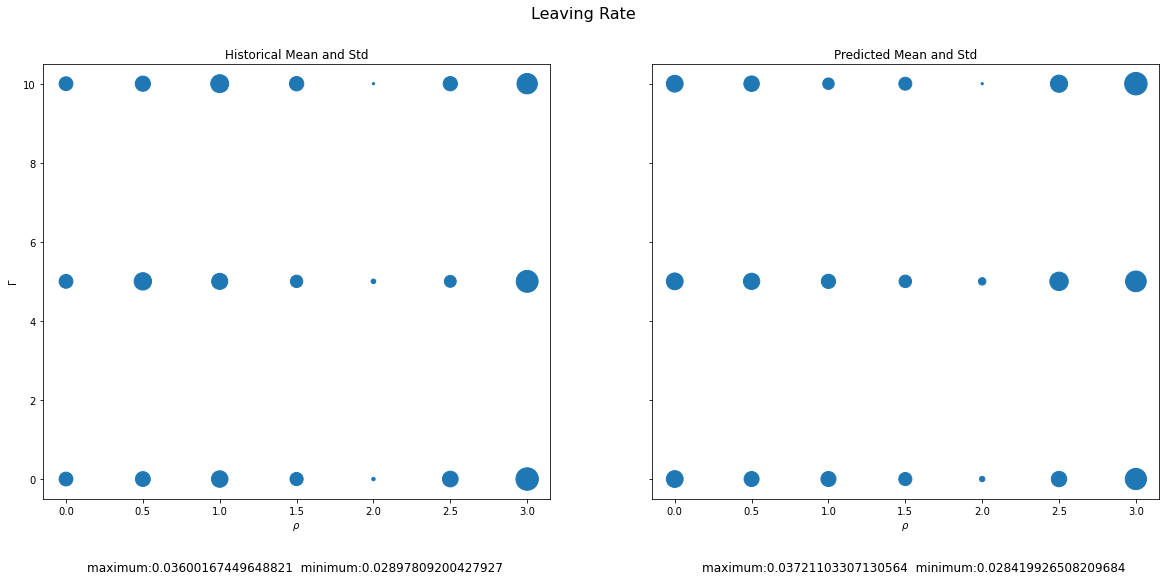

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

# Real data
leaving = [k['leaving_rate'] for k in metrics.values()]
maxi = max(leaving)
mini = min(leaving)
leaving_standard = (np.array(leaving)-mini)/(maxi-mini)

ax1.scatter(ro, gamma, s=(leaving_standard+0.01)*500)
ax1.set_xlabel(r"$\rho$")
ax1.set_ylabel(r"$\Gamma$")
ax1.set_title("Historical Mean and Std")

fig.text(0.3, 0, f"maximum:{maxi}  minimum:{mini}", ha='center', fontsize=12)

# Predicted data
leaving = [k['leaving_rate'] for k in metrics_graph.values()]
maxi = max(leaving)
mini = min(leaving)
leaving_standard = (np.array(leaving)-mini)/(maxi-mini)

ax2.scatter(ro, gamma, s=(leaving_standard+0.01)*500)
ax2.set_xlabel(r"$\rho$")
ax2.set_title("Predicted Mean and Std")

fig.text(0.73, 0, f"maximum:{maxi}  minimum:{mini}", ha='center', fontsize=12)

fig.suptitle('Leaving Rate', fontsize=16)

Text(0.5, 0.98, 'Average waiting time')

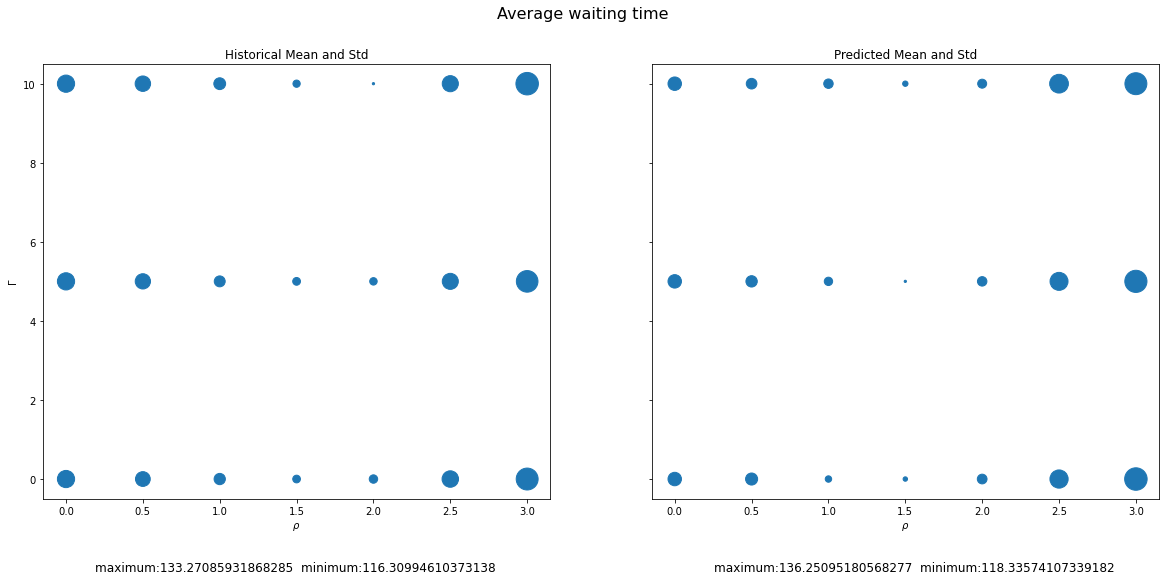

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

# Real data
waiting = [np.mean(k['waiting']) for k in metrics.values()]
maxi = max(waiting)
mini = min(waiting)
waiting_standard = (np.array(waiting)-mini)/(maxi-mini)

ax1.scatter(ro, gamma, s=(waiting_standard+0.01)*500)
ax1.set_xlabel(r"$\rho$")
ax1.set_ylabel(r"$\Gamma$")
ax1.set_title("Historical Mean and Std")

fig.text(0.3, 0, f"maximum:{maxi}  minimum:{mini}", ha='center', fontsize=12)

# Predicted data
waiting = [np.mean(k['waiting']) for k in metrics_graph.values()]
maxi = max(waiting)
mini = min(waiting)
waiting_standard = (np.array(waiting)-mini)/(maxi-mini)

ax2.scatter(ro, gamma, s=(waiting_standard+0.01)*500)
ax2.set_xlabel(r"$\rho$")
ax2.set_title("Predicted Mean and Std")

fig.text(0.73, 0, f"maximum:{maxi}  minimum:{mini}", ha='center', fontsize=12)

fig.suptitle('Average waiting time', fontsize=16)

Text(0.5, 0.98, 'Average traveling time')

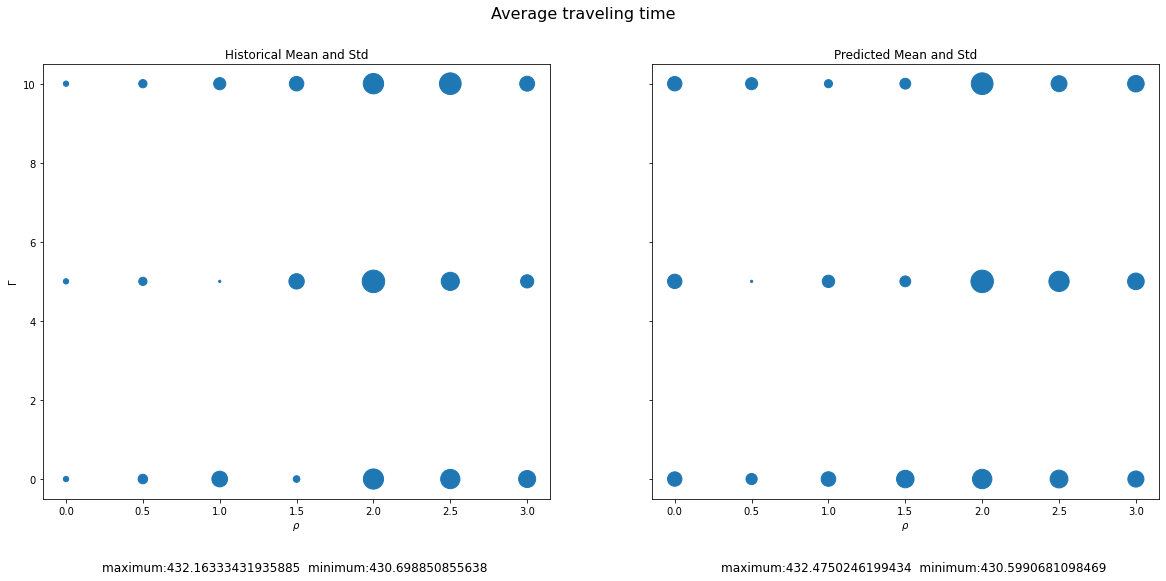

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

# Real data
traveling = [np.mean(k['traveling']) for k in metrics.values()]
maxi = max(traveling)
mini = min(traveling)
traveling_standard = (np.array(traveling)-mini)/(maxi-mini)

ax1.scatter(ro, gamma, s=(traveling_standard+0.01)*500)
ax1.set_xlabel(r"$\rho$")
ax1.set_ylabel(r"$\Gamma$")
ax1.set_title("Historical Mean and Std")

fig.text(0.3, 0, f"maximum:{maxi}  minimum:{mini}", ha='center', fontsize=12)

# Predicted data
traveling = [np.mean(k['traveling']) for k in metrics_graph.values()]
maxi = max(traveling)
mini = min(traveling)
waiting_standard = (np.array(traveling)-mini)/(maxi-mini)

ax2.scatter(ro, gamma, s=(waiting_standard+0.01)*500)
ax2.set_xlabel(r"$\rho$")
ax2.set_title("Predicted Mean and Std")

fig.text(0.73, 0, f"maximum:{maxi}  minimum:{mini}", ha='center', fontsize=12)

fig.suptitle('Average traveling time', fontsize=16)

### Poisson

In [7]:
for k,v in metrics.items():
    print(f"{k}:{np.mean(v['waiting'])}")

(3, 0):137.93366846217017
(3, 5):135.3609377300788
(3, 10):135.80744376827016


In [8]:
for k,v in metrics_graph.items():
    print(f"{k}:{np.mean(v['waiting'])}")

(3, 0):130.065893148018
(3, 5):129.693350761507
(3, 10):129.78270747175472
